# Inference Quickstart

This quickstart quide will walk through an example to load a model with Inference, run the model on an image, then display the resulting predictions using Supervision. 

### Install External Dependancies

In this example, we'll use [Supervision](https://github.com/roboflow/supervision) to annotate an image with our inference results.

In [1]:
!pip install supervision

### Roboflow API Key

To load models with `inference`, you'll need a Roboflow API Key. Find instructions for retrieving your API key [here](https://docs.roboflow.com/api-reference/authentication). The utility function below attempts to load your Roboflow API key from your enviornment. If it isn't found, it then prompts you to input it. To avoid needing to input your API key for each example, you can configure your Roboflow API key in your environment via the variable `ROBOFLOW_API_KEY`.

In [2]:
from utils import get_roboflow_api_key

api_key = get_roboflow_api_key()

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Quickstart Example

#### Load The Model
First, we load the roboflow model using its `model_id`. This model ID is from [Roboflow Universe](https://universe.roboflow.com/roboflow-100/soccer-players-5fuqs).

In [3]:
from inference.models.utils import get_model

image_url = (
    "https://storage.googleapis.com/com-roboflow-marketing/inference/soccer2.jpg"
)

model = get_model(
    model_id="soccer-players-5fuqs/1",
    api_key=api_key
)

#### Run Inference
Next we run inference using the model. We can pass the image URL directly to the model. Other accepted input types include Numpy Arrays, Pillow Images, and local image filepaths.

In [4]:
result = model.infer(image_url)[0]

#### Display Results
Now we can display our results using Supervision. We do this by loading our results in the Supervision Detections API, then creating a bounding box annotator and a label annotator.

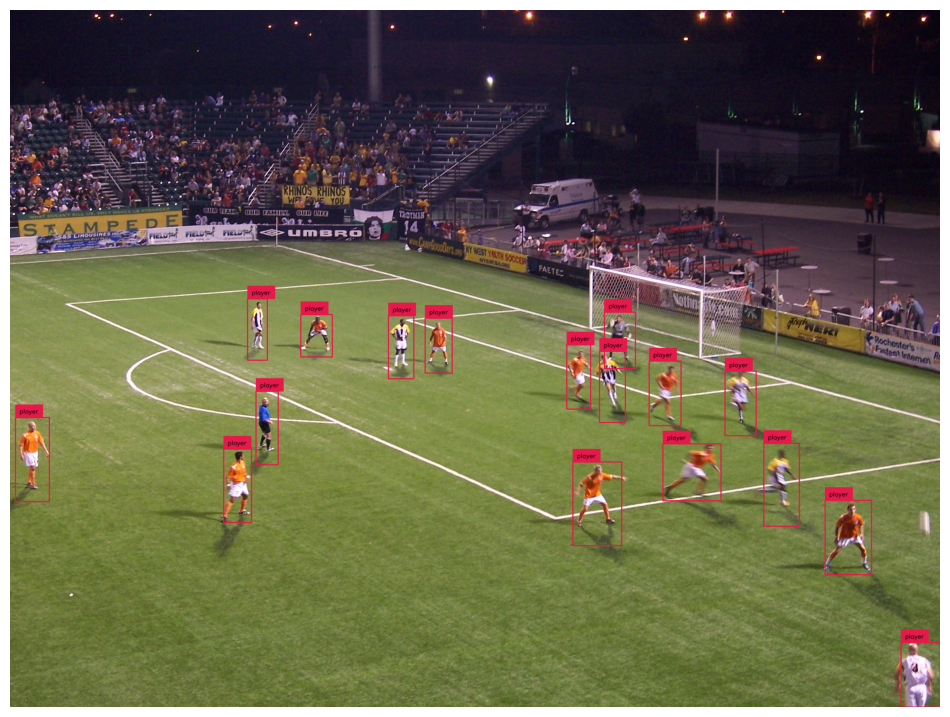

In [5]:
import supervision as sv
from utils import load_image_from_url

#Load detections from Roboflow
detections = sv.Detections.from_inference(result.dict(by_alias=True, exclude_none=True))

#Initialize annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

#Get class labels from inference results
labels = [p.class_name for p in result.predictions]

#Load image from url as numpy array
image = load_image_from_url(image_url)

#Annotate image
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

#Display annotations
sv.plot_image(annotated_image)
